# Taxi (Q Learning)

In this section, we aim to devise a solution for the Taxi problem utilizing the Q-Learning technique.

In [17]:
import gym
import numpy as np
import random
import imageio 
from matplotlib import pyplot as plt

## Context

In [10]:
env = gym.make("Taxi-v3", render_mode ="rgb_array")


In the Taxi problem, the state of the game is encoded as an 'int' between 0 and 500. Despite being displayed as a grid with some locations and passengers, all the combinations are represented as 'int'.

Because there 5 possible locations for the passenger, 25 possible taxi locations and 4 possible destinations => 25*5*4 = 500.
The encoding is possible because the game doesn't offer a lot of possibilities, and having only 500 different states can easily be handled.

In [11]:
state, info = env.reset()
state

262

In addition, we have 6 possible actions encoded as 'int' between 0 and 5 : move south, move north, move east, move west, pickup passenger and drop off passenger.

In [12]:
env.action_space.n

6

Now before applying the learning algorithm. Why QLearning ?
Because there are a limited number of states (only 500), and not a huge number of possible actions (onyl 6), using a Q-Table seems to be pretty designed for this task, this low dimension allow us to apply QLearning.

As a result our QTable, will be a table with a dimenson of 500x6, we want to have a table of all the states for each action, so that we know for a specific state what is the right action to take.

In [13]:
qtable = np.zeros((env.observation_space.n, env.action_space.n))

## QLearning Algorithm

We now want to make thecomputer learn the situation y using the algorithm of qlearning.


For a given number of episodes, we want the computer to be able to go to the passenger, pick him up and drop him off at one location, if the computer manage then it gets rewarded.
To penalize its slowness, the algorithm reward -1 for each step taken, and -10 if we "pick up" or "drop off" the passenger outside the specific areas.

For a given number of maximum steps (max number of action to take in order to complete the task). Either we explore or the take the best action given by the Qtable, take the action given and update the Qtable with the action and the new state.

In [14]:
achieve_steps = []
def QLearning(env, learning, discount, epsilon, max_steps, episodes):
    

    for i in range(episodes):
        print("Episodes n°:", i)
        state, info = env.reset()
        done = False
        decay_rate= 0.005


        for j in range(max_steps):
            if random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(qtable[state, :])

            new_state, reward, done, truncated, info = env.step(action)

            qtable[state, action] = qtable[state, action] + learning * (reward + discount * np.max(qtable[new_state, :])-qtable[state, action])

            state = new_state

            if done == True:
                break
        achieve_steps.append(j)
        epsilon = np.exp(-decay_rate*i)


## Let's learn!

In [15]:
QLearning(env, 0.9, 0.8, 1.0, 99, 1000)

Episodes n°: 0
Episodes n°: 1
Episodes n°: 2
Episodes n°: 3
Episodes n°: 4
Episodes n°: 5
Episodes n°: 6
Episodes n°: 7
Episodes n°: 8
Episodes n°: 9
Episodes n°: 10
Episodes n°: 11
Episodes n°: 12
Episodes n°: 13
Episodes n°: 14
Episodes n°: 15
Episodes n°: 16
Episodes n°: 17
Episodes n°: 18
Episodes n°: 19
Episodes n°: 20
Episodes n°: 21
Episodes n°: 22
Episodes n°: 23
Episodes n°: 24
Episodes n°: 25
Episodes n°: 26
Episodes n°: 27
Episodes n°: 28
Episodes n°: 29
Episodes n°: 30
Episodes n°: 31
Episodes n°: 32
Episodes n°: 33
Episodes n°: 34
Episodes n°: 35
Episodes n°: 36
Episodes n°: 37
Episodes n°: 38
Episodes n°: 39
Episodes n°: 40
Episodes n°: 41
Episodes n°: 42
Episodes n°: 43
Episodes n°: 44
Episodes n°: 45
Episodes n°: 46
Episodes n°: 47
Episodes n°: 48
Episodes n°: 49
Episodes n°: 50
Episodes n°: 51
Episodes n°: 52
Episodes n°: 53
Episodes n°: 54
Episodes n°: 55
Episodes n°: 56
Episodes n°: 57
Episodes n°: 58
Episodes n°: 59
Episodes n°: 60
Episodes n°: 61
Episodes n°: 62
Ep

c:\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episodes n°: 91
Episodes n°: 92
Episodes n°: 93
Episodes n°: 94
Episodes n°: 95
Episodes n°: 96
Episodes n°: 97
Episodes n°: 98
Episodes n°: 99
Episodes n°: 100
Episodes n°: 101
Episodes n°: 102
Episodes n°: 103
Episodes n°: 104
Episodes n°: 105
Episodes n°: 106
Episodes n°: 107
Episodes n°: 108
Episodes n°: 109
Episodes n°: 110
Episodes n°: 111
Episodes n°: 112
Episodes n°: 113
Episodes n°: 114
Episodes n°: 115
Episodes n°: 116
Episodes n°: 117
Episodes n°: 118
Episodes n°: 119
Episodes n°: 120
Episodes n°: 121
Episodes n°: 122
Episodes n°: 123
Episodes n°: 124
Episodes n°: 125
Episodes n°: 126
Episodes n°: 127
Episodes n°: 128
Episodes n°: 129
Episodes n°: 130
Episodes n°: 131
Episodes n°: 132
Episodes n°: 133
Episodes n°: 134
Episodes n°: 135
Episodes n°: 136
Episodes n°: 137
Episodes n°: 138
Episodes n°: 139
Episodes n°: 140
Episodes n°: 141
Episodes n°: 142
Episodes n°: 143
Episodes n°: 144
Episodes n°: 145
Episodes n°: 146
Episodes n°: 147
Episodes n°: 148
Episodes n°: 149
Episod

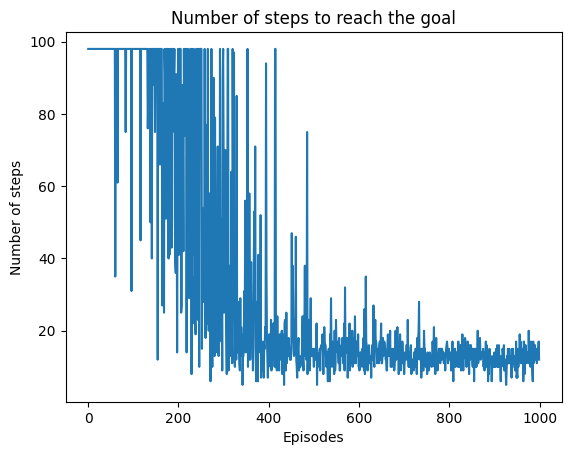

In [16]:
plt.plot(achieve_steps)
plt.title('Number of steps to reach the goal')
plt.xlabel('Episodes')
plt.ylabel('Number of steps')
plt.show()

Despite being quite noisy, the graph demonstrates a clear convergence over time. This indicates that the Q-Learning method is a good solution to solve this taks.
However, it shows that with current parameters, it requires at least 400 epochs to solve the task in an moderate number of steps.

## Create the GIF

In [21]:
env.close()
env = gym.make("Taxi-v3", render_mode ="rgb_array")

state,info = env.reset()

images = []


while 1>0:

    action = np.argmax(qtable[state,:])
    new_state, reward, done, trunc, info = env.step(action)
    frame = env.render()
    images.append(frame)
    state= new_state

    if done == True:
        break

env.close()
imageio.mimsave('img/Taxi3.gif', images, fps=59)